# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("CLIENT_ID")
PLAID_SECRET = os.getenv("SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [6]:
# Set the institution id
INSITUTION_ID = "ins_109508"
#client.Institutions.get(2)

### 2. Generate a public token

In [7]:
# Create the public token

create_tkn_response = client.Sandbox.public_token.create(INSITUTION_ID, ['transactions','income','assets'])

# Print the public token
create_tkn_response["public_token"]

'public-sandbox-64058f1d-1b49-47d1-bf04-24649c0c863b'

### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access toke
exchange_response['access_token']

'access-sandbox-99adac27-da7a-46fe-a498-92939704b622'

In [9]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [10]:
# Retrieve accounts

response = client.Accounts.get(access_token)

# Print accounts
response["accounts"]

[{'account_id': 'DbEWvg9ePoIdNAJqzERlTlzZNlK5oBtvx3eqV',
  'balances': {'available': 100,
   'current': 110,
   'iso_currency_code': 'USD',
   'limit': None,
   'unofficial_currency_code': None},
  'mask': '0000',
  'name': 'Plaid Checking',
  'official_name': 'Plaid Gold Standard 0% Interest Checking',
  'subtype': 'checking',
  'type': 'depository'},
 {'account_id': 'VPzQ9d73bpSaXZ8QVy9MuMo4BM7DqbhWe9kMz',
  'balances': {'available': 200,
   'current': 210,
   'iso_currency_code': 'USD',
   'limit': None,
   'unofficial_currency_code': None},
  'mask': '1111',
  'name': 'Plaid Saving',
  'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
  'subtype': 'savings',
  'type': 'depository'},
 {'account_id': 'wa6podePW3IR73AjJG4lCn7QjnXwa6urjP9X5',
  'balances': {'available': None,
   'current': 1000,
   'iso_currency_code': 'USD',
   'limit': None,
   'unofficial_currency_code': None},
  'mask': '2222',
  'name': 'Plaid CD',
  'official_name': 'Plaid Bronze Standard 0.2% Intere

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [30]:
# Set the start and end date 90 days from today

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days

transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print the transactions
transaction_response.keys()
transactions_list = transaction_response["transactions"]

### 2. Print the categories for each transaction

In [31]:
# Create a for-loop to print the categories for each transaction
for transaction in range(len(transactions_list)):
    print(transactions_list[transaction]["category"][0])


Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink


In [32]:
transactions_list[0]

{'account_id': 'DbEWvg9ePoIdNAJqzERlTlzZNlK5oBtvx3eqV',
 'account_owner': None,
 'amount': 12,
 'authorized_date': None,
 'category': ['Food and Drink', 'Restaurants', 'Fast Food'],
 'category_id': '13005032',
 'date': '2020-07-11',
 'iso_currency_code': 'USD',
 'location': {'address': None,
  'city': None,
  'country': None,
  'lat': None,
  'lon': None,
  'postal_code': None,
  'region': None,
  'store_number': '3322'},
 'merchant_name': "McDonald's",
 'name': "McDonald's",
 'payment_channel': 'in store',
 'payment_meta': {'by_order_of': None,
  'payee': None,
  'payer': None,
  'payment_method': None,
  'payment_processor': None,
  'ppd_id': None,
  'reason': None,
  'reference_number': None},
 'pending': False,
 'pending_transaction_id': None,
 'transaction_code': None,
 'transaction_id': 'BGo8mpgj4wiZa8BVnL5GSM4r8zPV7Jswn4ybr',
 'transaction_type': 'place',
 'unofficial_currency_code': None}

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [33]:
# Define an empty DataFrame and set the columns as date, name, amount, and category

transactions_df = pd.DataFrame()


# Retrieve all the transactions

date_list = []
name_list = []
amount_list = []
category_list = []

for transaction in range(len(transactions_list)):
    date_list.append(transactions_list[transaction]["date"])
    name_list.append(transactions_list[transaction]["name"])
    amount_list.append(transactions_list[transaction]["amount"])
    category_list.append(transactions_list[transaction]["category"][0])

# Populate the transactions DataFrame with the transactions data


transactions_df["Date"] = pd.Series(date_list)
transactions_df["Name"] = pd.Series(name_list)
transactions_df["Amount"] = pd.Series(amount_list)
transactions_df["Category"] = pd.Series(category_list)

# Display sample data from the DataFrame    
transactions_df.head()

,Date,Name,Amount,Category
0,2020-07-11,McDonald's,12.00,Food and Drink
1,2020-07-11,Starbucks,4.33,Food and Drink
2,2020-07-10,SparkFun,89.40,Food and Drink
3,2020-07-09,INTRST PYMNT,-4.22,Transfer
4,2020-06-29,United Airlines,500.00,Travel


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [34]:
# Display data types
transactions_df.dtypes

Date         object
Name         object
Amount      float64
Category     object
dtype: object

In [35]:
# Make any required data type transformation
transactions_df['Date'] = pd.to_datetime(transactions_df['Date']).dt.normalize()
transactions_df.head()

,Date,Name,Amount,Category
0,2020-07-11,McDonald's,12.00,Food and Drink
1,2020-07-11,Starbucks,4.33,Food and Drink
2,2020-07-10,SparkFun,89.40,Food and Drink
3,2020-07-09,INTRST PYMNT,-4.22,Transfer
4,2020-06-29,United Airlines,500.00,Travel


In [36]:
# Set the date column as index
transactions_df.set_index("Date", inplace=True)

# Display sample data
transactions_df.head()

,Name,Amount,Category
Date,,,
2020-07-11,McDonald's,12.00,Food and Drink
2020-07-11,Starbucks,4.33,Food and Drink
2020-07-10,SparkFun,89.40,Food and Drink
2020-07-09,INTRST PYMNT,-4.22,Transfer
2020-06-29,United Airlines,500.00,Travel


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [37]:
# Fetch de income data
income_response = client.Income.get(access_token)

# Print the income data
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'jmgRxXINdTVfagc'}

In [38]:
# Determine the previous year's gross income and print the results
income_response["income"]["last_year_income_before_tax"]

7285

In [39]:
# Determine the current monthly income and print the results
income_response["income"]["income_streams"][0]["monthly_income"]

500

In [40]:
# Determine the projected yearly income and print the results
income_response["income"]["projected_yearly_income"]

6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [41]:
transactions_df.head()

,Name,Amount,Category
Date,,,
2020-07-11,McDonald's,12.00,Food and Drink
2020-07-11,Starbucks,4.33,Food and Drink
2020-07-10,SparkFun,89.40,Food and Drink
2020-07-09,INTRST PYMNT,-4.22,Transfer
2020-06-29,United Airlines,500.00,Travel


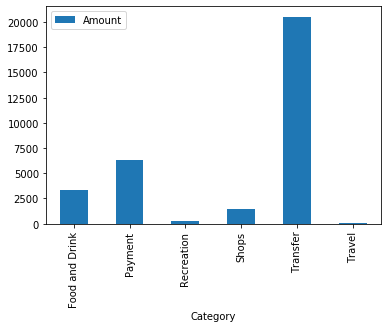

In [42]:
# Compute the total expenses per category
total_exp = transactions_df.groupby("Category").sum()

# Display the expenses per catefory
total_exp.plot(kind ="bar")

In [43]:
total_exp

,Amount
Category,
Food and Drink,3333.52
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83d3b7ee10>],
      dtype=object)

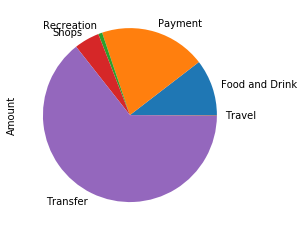

In [44]:
# Create a spending categories pie chart.
total_exp.plot(kind="pie" , subplots=True, legend=False)

### Calculate the expenses per month

In [45]:
# Create a DataFrame with the total expenses
expenses_by_month = transactions_df.groupby(by=[transactions_df.index.year, transactions_df.index.month], sort=False).sum()

# Display sample data
expenses_by_month

Amount
Date Date          
2020 7       101.51
     6     10645.24
     5     10645.24
     4     10560.06

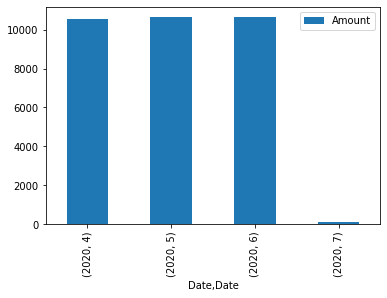

In [46]:
# Create a spending per month bar chart
expenses_by_month.sort_index().plot.bar()